In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('scaler_apollo_hospitals.csv')

In [3]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [4]:
df.shape

(1338, 8)

In [5]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'smoker', 'region', 'viral load',
       'severity level', 'hospitalization charges'],
      dtype='object')

In [6]:
df.drop( columns='Unnamed: 0', inplace = True)

In [7]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [10]:
# No null values found
df.isnull().sum(axis = 0)

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [11]:
for features in df.columns:
    print(f'\033[95m{features}\033[0m')
    print(np.sort(df[features].unique()))

age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
sex
['female' 'male']
smoker
['no' 'yes']
region
['northeast' 'northwest' 'southeast' 'southwest']
viral load
[ 5.32  5.6   5.73  5.76  5.8   5.83  5.89  5.92  5.93  5.95  5.98  6.02
  6.1   6.11  6.17  6.2   6.24  6.3   6.33  6.36  6.4   6.43  6.49  6.52
  6.6   6.62  6.65  6.68  6.7   6.71  6.74  6.77  6.78  6.8   6.81  6.84
  6.87  6.9   6.93  6.97  7.    7.03  7.04  7.09  7.1   7.12  7.13  7.16
  7.17  7.19  7.22  7.23  7.25  7.26  7.27  7.28  7.3   7.32  7.33  7.35
  7.37  7.38  7.41  7.43  7.47  7.5   7.53  7.54  7.57  7.59  7.6   7.63
  7.66  7.67  7.7   7.73  7.74  7.76  7.77  7.79  7.8   7.82  7.85  7.87
  7.88  7.89  7.9   7.92  7.93  7.95  7.96  7.97  7.98  7.99  8.01  8.03
  8.04  8.08  8.1   8.11  8.13  8.14  8.17  8.18  8.2   8.21  8.23  8.25
  8.26  8.29  8.3   8.32  8.33  8.36  8.37  8.39  8.4   8.42  8.43  8.46
  8.47  8.49

<AxesSubplot:xlabel='hospitalization charges'>

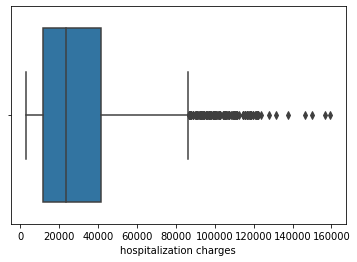

In [12]:
# Outlier detection in 'hospitalization charges' feature
#before treatment
sns.boxplot(df['hospitalization charges'])

In [13]:
# outlier treatment
Q3 = np.quantile(df['hospitalization charges'], 0.75)
Q1 = np.quantile(df['hospitalization charges'], 0.25)
IQR = Q3 - Q1
df = df[df['hospitalization charges'] <= (Q3 + IQR)]

<AxesSubplot:xlabel='hospitalization charges'>

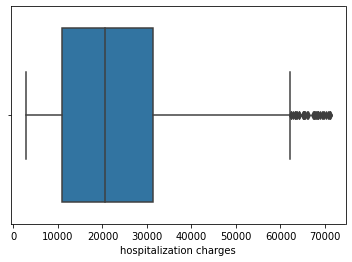

In [14]:
# Outlier detection in 'hospitalization charges' feature
# After treatment we can see very less outliers
sns.boxplot(df['hospitalization charges'])

age : 0.5035075160130632
SpearmanrResult(correlation=0.6559797852738564, pvalue=9.253018659988762e-145)


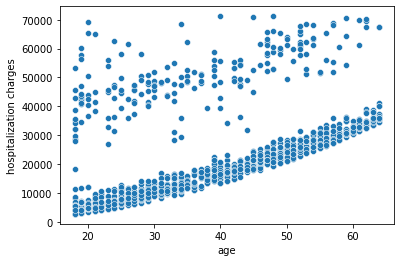

severity level : 0.11195036995570835
SpearmanrResult(correlation=0.15372222669839467, pvalue=1.2801792981473652e-07)


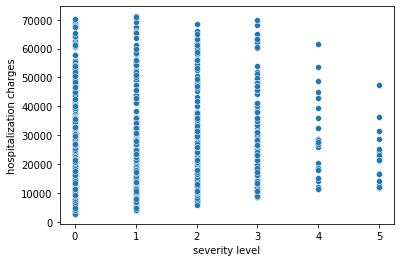

viral load : -0.07599691092469366
SpearmanrResult(correlation=-0.04812086420297641, pvalue=0.10007795999915206)


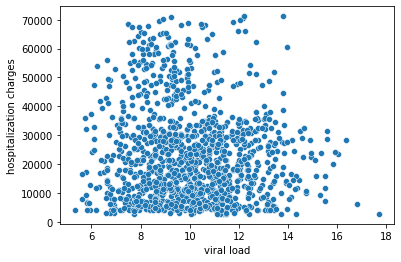

In [15]:
# Calculating correlation coeff between Ordinal categorical or continuos independent variables and dependent variables
for columns in ['age', 'severity level', 'viral load']:
    print(f'\033[95m{columns}\033[0m :', np.corrcoef(df[columns], df['hospitalization charges'])[0,1])
    print(stats.spearmanr(df[columns], df['hospitalization charges']))
    sns.scatterplot(df[columns], df['hospitalization charges'])
    plt.show()
# We can see that there is moderate postive correlation between age and hospitalisation charges. 

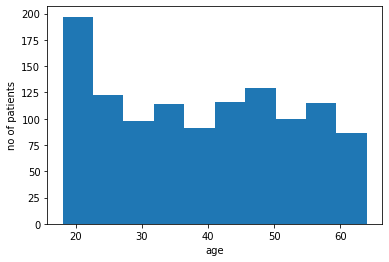

In [16]:
df['age'].plot(kind = 'hist')
plt.xlabel('age')
plt.ylabel('no of patients')
plt.show()

sex


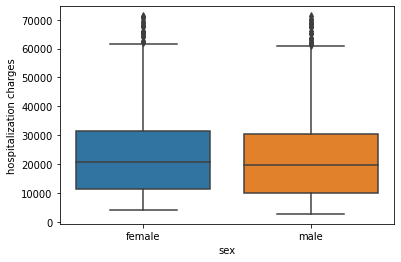

smoker


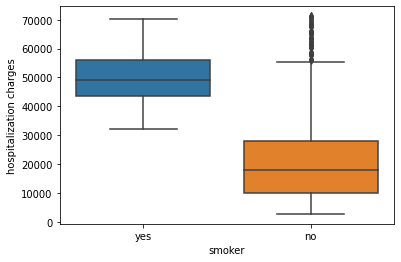

region


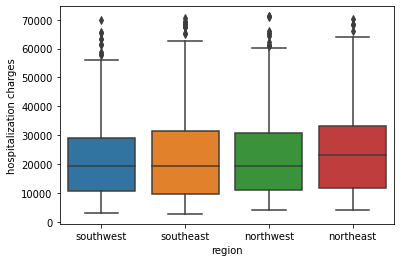

In [17]:
# Since sex, smoker and region are Nominal categorical variables, I used box plot to check relationships
for features in ['sex', 'smoker', 'region']:
    print(f'\033[95m{features}\033[0m')
    sns.boxplot(y = df['hospitalization charges'], x = df[features])
    plt.show()
# We can see that there is not much difference in medians for different types of sex and regions. But, we can clearly see that
# A smoker pays way more hospital charges as compared to a non smoker

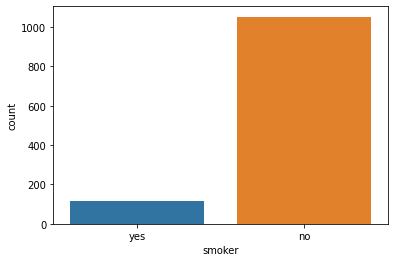

In [18]:
sns.countplot(df['smoker'])
plt.show()

### Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

In [19]:
temp1 = df['hospitalization charges'].apply(lambda x : math.log(x))
temp2 = stats.boxcox(df['hospitalization charges'])[0]

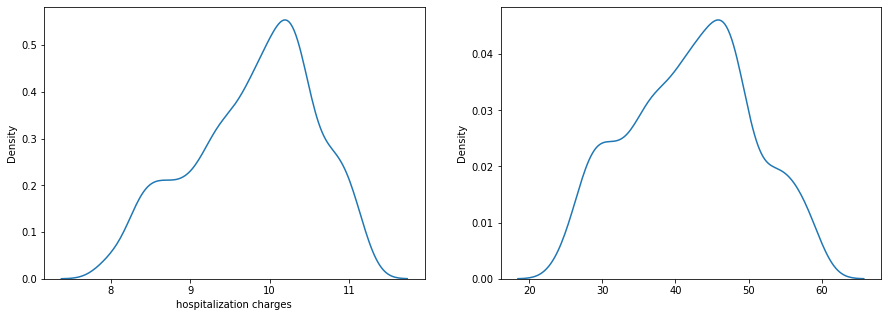

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(temp1)
plt.subplot(1,2,2)
sns.kdeplot(temp2)
plt.show()

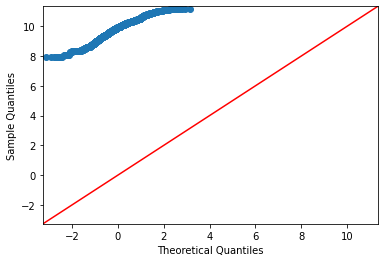

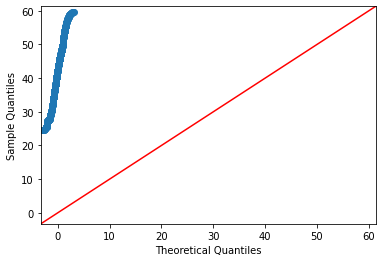

In [21]:
# Assumption 1 - Normality check
# Even though the transformations were unsuccessful, we will still go ahead with the test. I am going with the log transformed
# data which is temp1
for i in [temp1, temp2]:
    sm.qqplot(i, line = '45')
    plt.show()

In [22]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [23]:
smoker = df[df['smoker'] == 'yes']['hospitalization charges'].apply(lambda x : math.log2(x))
non_smoker = df[df['smoker'] == 'no']['hospitalization charges'].apply(lambda x : math.log2(x))

In [24]:
#assumption 2 -  Independence: The observations in smokers sample are independent of the observations in the non-smokers sample.
#assumption 3 - Variance check:
# Variance is almost close
print(np.var(smoker), np.var(non_smoker))

0.06414808481523109 1.1045253042034382


In [45]:
# Null Hypothesis(H0)  =  the mean of the distribution underlying the smoker's sample 
# is less than or equal to the mean of the distribution underlying the non_smoker's sample.
# Alternative Hypothesis(Ha) = the mean of the distribution underlying the smoker's sample 
# is less greater than the mean of the distribution underlying the non_smoker's sample.
# Considering significance level alpha as 1% or 0.01
# We can see that α <<<< 0.01.
# Hence, we reject Null hypothesis proving that the hospitalization charges of smokers is greater than those who don't.
stats.ttest_ind(smoker, non_smoker, alternative = 'greater')

Ttest_indResult(statistic=16.6542202510441, pvalue=2.447533071235689e-56)

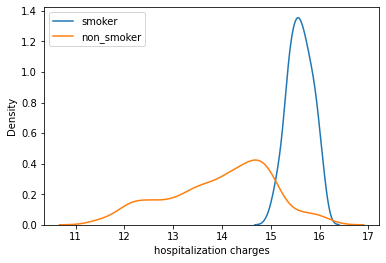

In [26]:
sns.kdeplot(smoker)
sns.kdeplot(non_smoker)
plt.legend(['smoker', 'non_smoker'])
plt.show()

### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

<AxesSubplot:xlabel='viral load', ylabel='Density'>

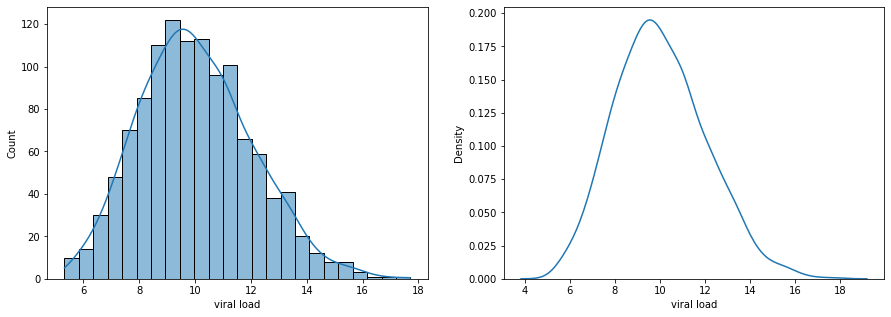

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['viral load'], kde = True)
plt.subplot(1,2,2)
sns.kdeplot(df['viral load'])

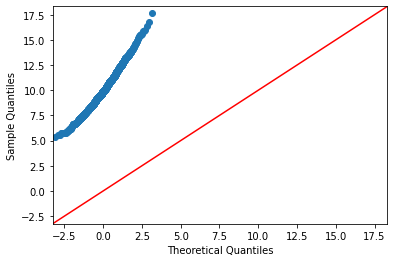

In [28]:
# Assumption 1 - Normality check
sm.qqplot(df['viral load'], line = '45')
plt.show()

In [29]:
temp3 = df['viral load'].apply(lambda x : math.log2(x))

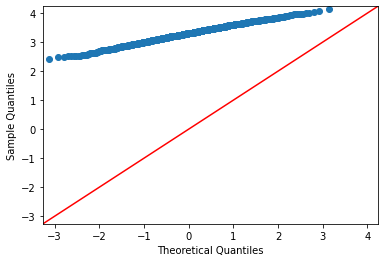

In [30]:
# Eventhough it is not perfectly normal, we will still go ahead with the test
sm.qqplot((temp3), line = '45')
plt.show()

In [31]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [32]:
male_viral_load = df[df['sex'] == 'female']['viral load'].apply(lambda x : math.log2(x))
female_viral_load = df[df['sex'] == 'male']['viral load'].apply(lambda x : math.log2(x))

In [33]:
#assumption 2 - Independence: The observations in male sample are independent of the observations in the female sample.
#assumption 3 - Variance check:
# Variance is almost close
print(np.var(male_viral_load), np.var(female_viral_load))

0.08503238750160975 0.08637491581868104


In [34]:
# Null Hypothesis(H0)  =  the mean of the distribution underlying the male_viral_load sample 
# is almost equal to the mean of the distribution underlying the female_viral_load sample.
# Alternative Hypothesis(Ha) = the mean of the distribution underlying the male_viral_load sample 
# is not equal to the mean of the distribution underlying the female_viral_load sample.
# Considering significance level alpha as 1% or 0.01
# We can see that α > 0.01.
# Hence, we fail to reject Null hypothesis 
# disproving with statistical evidence that the viral load of females is different from that of males
stats.ttest_ind(male_viral_load, female_viral_load, alternative = 'two-sided')

Ttest_indResult(statistic=-0.8769877613028754, pvalue=0.3806737797622711)

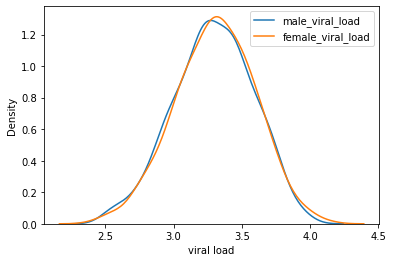

In [35]:
sns.kdeplot(male_viral_load)
sns.kdeplot(female_viral_load)
plt.legend(['male_viral_load', 'female_viral_load'])
plt.show()

### Is the proportion of smoking significantly different across different regions? (Chi-square)

In [36]:
# Both regions and smoker features are categorical and chi-square test is a non-parametric test
# Only assumption of chi-square is that the datapoints in the table should be frequency in count which is already satisfied.  
table = pd.crosstab(df['smoker'], df['region'], margins=True)
table

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
no,253,262,272,265,1052
yes,34,29,31,23,117
All,287,291,303,288,1169


In [37]:
# Null hypothesis (Ho) - regions and smoker features are independent or there is no relation between the two features
# Alternate hypothesis (Ha) - regions and smoker features are dependent or there is a relation between the two features
# Let significance level α be 5% or 0.05
# We can see that p >>>> 0.05.
# We fail to reject Ho which states clear independence. 
# Hence, proportion of smoking is not different across different regions.
stat, p, dof, expected = stats.chi2_contingency(table)
print(stat, p)

2.401763839975969 0.9661544800033622


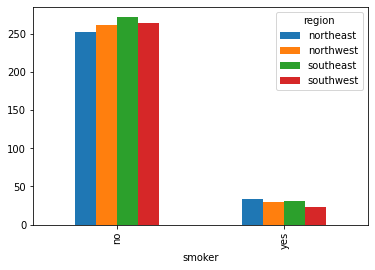

In [38]:
pd.crosstab(df['smoker'], df['region'], margins=False).plot(kind='bar')
plt.show()

### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

In [39]:
# Assumption 1 - Normality check
temp3 = df['viral load'].apply(lambda x : math.log2(x))

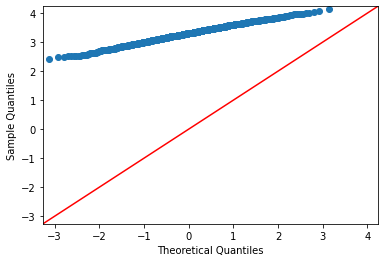

In [40]:
# Eventhough it is not perfectly normal, we will still go ahead with the test
sm.qqplot((temp3), line = '45')
plt.show()

In [41]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [42]:
# Assumption 2 (Sample independence) - Considering different samples have been taken for women from 0, 1, 2 severity leves.
# Assumption 3 - Variance check, We can see that variances are almost same
zero_lvl = df[(df['sex'] == 'female') & (df['severity level'] == 0)]['viral load']
first_lvl = df[(df['sex'] == 'female') & (df['severity level'] == 1)]['viral load']
second_lvl = df[(df['sex'] == 'female') & (df['severity level'] == 2)]['viral load']
print(np.var(zero_lvl), np.var(first_lvl), np.var(second_lvl))

3.849109437843801 3.643409331018953 4.544950730399408


In [43]:
# Ho(Null Hypothesis) = Mean viral load is same across all samples.
# Ha(Alternate Hypothesis) = There is be at least one population mean that differs from the rest.
# Let significance level (α) = 5% or p-value = 0.05
# We get p-val > 0.05 and we fail to reject null hypothesis.
# Hence mean viral load of women with 0 Severity level , 1 Severity level and 2 Severity level is the same.
stats.f_oneway(zero_lvl, first_lvl, second_lvl)

F_onewayResult(statistic=0.1253077176238367, pvalue=0.882252752825897)

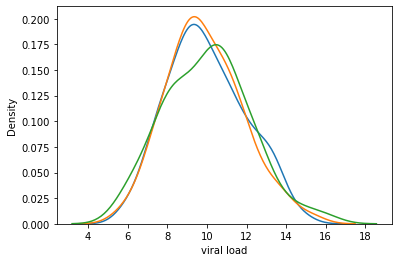

In [44]:
sns.kdeplot(zero_lvl)
sns.kdeplot(first_lvl)
sns.kdeplot(second_lvl)
plt.show()